In [59]:
from statsmodels.tsa.arima.model import ARIMA

In [60]:
import pandas as pd
df = pd.read_csv('./signed_stem.csv')
df

,Unnamed: 0,Unnamed: 0.1,Date,Text,Site,URL,HasWords,Change,ChangeSign
0,0,168,2023-04-12,«ментовск войны» обошл приквел «игр престолов»...,rbc,https://www.rbc.ru/technology_and_media/12/04/...,True,0.0,0
1,1,128,2023-04-12,рпц назва «странной» возможн пасхальн перемир ...,rbc,https://www.rbc.ru/politics/12/04/2023/64368d1...,False,0.0,0
2,2,174,2023-04-12,«велик отказ» компан росс теря деньг массов фе...,rbc,https://pro.rbc.ru/news/642fddfc9a794725b5dc71...,False,0.0,0
3,3,172,2023-04-12,набиуллин увидел повод влиян курс рубл цб выст...,rbc,https://www.rbc.ru/economics/12/04/2023/64365f...,True,0.0,0
4,4,170,2023-04-12,британ ввел санкц прот usm усманов член сем ке...,rbc,https://www.rbc.ru/politics/12/04/2023/6436633...,True,0.0,0
...,...,...,...,...,...,...,...,...,...
144344,144344,81842,2015-01-01,cудмедэксперт приступ осмотр тел жертв крушен ...,interfax,NaN,False,0.0,0
144345,144345,81843,2015-01-01,кадыр сообщ уничтожен главар бандгрупп мус зав...,interfax,NaN,False,0.0,0
144346,144346,81846,2015-01-01,роспотребнадзор призва россия перееда напива п...,interfax,NaN,False,0.0,0
144347,144347,81845,2015-01-01,российск спасател присоедин поиск малайзийск с...,interfax,NaN,False,0.0,0


In [62]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Unnamed: 0,Unnamed: 0.1,Date,Text,Site,URL,HasWords,Change,ChangeSign
0,0,168,2023-04-12,«ментовск войны» обошл приквел «игр престолов»...,rbc,https://www.rbc.ru/technology_and_media/12/04/...,True,0.0,0
1,1,128,2023-04-12,рпц назва «странной» возможн пасхальн перемир ...,rbc,https://www.rbc.ru/politics/12/04/2023/64368d1...,False,0.0,0
2,2,174,2023-04-12,«велик отказ» компан росс теря деньг массов фе...,rbc,https://pro.rbc.ru/news/642fddfc9a794725b5dc71...,False,0.0,0
3,3,172,2023-04-12,набиуллин увидел повод влиян курс рубл цб выст...,rbc,https://www.rbc.ru/economics/12/04/2023/64365f...,True,0.0,0
4,4,170,2023-04-12,британ ввел санкц прот usm усманов член сем ке...,rbc,https://www.rbc.ru/politics/12/04/2023/6436633...,True,0.0,0
...,...,...,...,...,...,...,...,...,...
144344,144344,81842,2015-01-01,cудмедэксперт приступ осмотр тел жертв крушен ...,interfax,NaN,False,0.0,0
144345,144345,81843,2015-01-01,кадыр сообщ уничтожен главар бандгрупп мус зав...,interfax,NaN,False,0.0,0
144346,144346,81846,2015-01-01,роспотребнадзор призва россия перееда напива п...,interfax,NaN,False,0.0,0
144347,144347,81845,2015-01-01,российск спасател присоедин поиск малайзийск с...,interfax,NaN,False,0.0,0


In [63]:
import re

class Porter:
    PERFECTIVEGROUND =  re.compile(u"((ив|ивши|ившись|ыв|ывши|ывшись)|((?<=[ая])(в|вши|вшись)))$")
    REFLEXIVE = re.compile(u"(с[яь])$")
    ADJECTIVE = re.compile(u"(ее|ие|ые|ое|ими|ыми|ей|ий|ый|ой|ем|им|ым|ом|его|ого|ему|ому|их|ых|ую|юю|ая|яя|ою|ею)$")
    PARTICIPLE = re.compile(u"((ивш|ывш|ующ)|((?<=[ая])(ем|нн|вш|ющ|щ)))$")
    VERB = re.compile(u"((ила|ыла|ена|ейте|уйте|ите|или|ыли|ей|уй|ил|ыл|им|ым|ен|ило|ыло|ено|ят|ует|уют|ит|ыт|ены|ить|ыть|ишь|ую|ю)|((?<=[ая])(ла|на|ете|йте|ли|й|л|ем|н|ло|но|ет|ют|ны|ть|ешь|нно)))$")
    NOUN = re.compile(u"(а|ев|ов|ие|ье|е|иями|ями|ами|еи|ии|и|ией|ей|ой|ий|й|иям|ям|ием|ем|ам|ом|о|у|ах|иях|ях|ы|ь|ию|ью|ю|ия|ья|я)$")
    RVRE = re.compile(u"^(.*?[аеиоуыэюя])(.*)$")
    DERIVATIONAL = re.compile(u".*[^аеиоуыэюя]+[аеиоуыэюя].*ость?$")
    DER = re.compile(u"ость?$")
    SUPERLATIVE = re.compile(u"(ейше|ейш)$")
    I = re.compile(u"и$")
    P = re.compile(u"ь$")
    NN = re.compile(u"нн$")

    def stem(word):
        word = word.lower()
        word = word.replace(u'ё', u'е')
        m = re.match(Porter.RVRE, word)
        if m is None:
            return word
        if m.groups():
            pre = m.group(1)
            rv = m.group(2)
            temp = Porter.PERFECTIVEGROUND.sub('', rv, 1)
            if temp == rv:
                rv = Porter.REFLEXIVE.sub('', rv, 1)
                temp = Porter.ADJECTIVE.sub('', rv, 1)
                if temp != rv:
                    rv = temp
                    rv = Porter.PARTICIPLE.sub('', rv, 1)
                else:
                    temp = Porter.VERB.sub('', rv, 1)
                    if temp == rv:
                        rv = Porter.NOUN.sub('', rv, 1)
                    else:
                        rv = temp
            else:
                rv = temp
            
            rv = Porter.I.sub('', rv, 1)

            if re.match(Porter.DERIVATIONAL, rv):
                rv = Porter.DER.sub('', rv, 1)

            temp = Porter.P.sub('', rv, 1)
            if temp == rv:
                rv = Porter.SUPERLATIVE.sub('', rv, 1)
                rv = Porter.NN.sub(u'н', rv, 1)
            else:
                rv = temp
            word = pre+rv
        return word
    stem=staticmethod(stem)
def stemming(s):
    s = s.split()
    s = map(lambda ss: Porter.stem(ss), s)
    return " ".join(s)

In [64]:
with open("./words.txt", 'r', encoding='UTF-8') as file:
    lines = [line.rstrip() for line in file]
lines.append('газпром')
lines = list(set([stemming(line) for line in lines]))
indices = []
for i in range(len(lines)):
    line = lines[i]
    for c in line:
        if c in "$#-0123456789":
            indices.append(i)
            break
        if c in "abcdefghijklmnopqrstuvxyz":
            indices.append(i)
            break
lines = [lines[i] for i in range(len(lines)) if not lines[i] in indices]
dictionary = {}
for i in range(len(lines)):
    dictionary[lines[i]] = i

In [65]:
print(len(dictionary))

76917


In [66]:
import numpy as np
import math

idf = np.zeros(len(dictionary))
for i in range(df.shape[0]):
    words = list(set(df['Text'].iloc[i].split()))
    for w in words:
        if w in dictionary:
            idf[dictionary[w]] += 1
idf = np.log(df.shape[0] / idf)
for i in range(len(dictionary)):
    if math.isinf(idf[i]):
        idf[i] = 0

def vectorize(text, dictionary):
    words = text.split()
    tf = np.zeros(len(dictionary))
    for w in words:
        if w in dictionary:
            tf[dictionary[w]] += 1
    tf /= len(words)
    return tf * idf

C:\Users\Egor Kolyuzhnov\AppData\Local\Temp\ipykernel_242348\1720982303.py:10: RuntimeWarning: divide by zero encountered in divide
  idf = np.log(df.shape[0] / idf)


In [67]:
import datetime
df = df[df['Date'] >= datetime.datetime(2023, 1, 1)]
df

,Unnamed: 0,Unnamed: 0.1,Date,Text,Site,URL,HasWords,Change,ChangeSign
0,0,168,2023-04-12,«ментовск войны» обошл приквел «игр престолов»...,rbc,https://www.rbc.ru/technology_and_media/12/04/...,True,0.00,0
1,1,128,2023-04-12,рпц назва «странной» возможн пасхальн перемир ...,rbc,https://www.rbc.ru/politics/12/04/2023/64368d1...,False,0.00,0
2,2,174,2023-04-12,«велик отказ» компан росс теря деньг массов фе...,rbc,https://pro.rbc.ru/news/642fddfc9a794725b5dc71...,False,0.00,0
3,3,172,2023-04-12,набиуллин увидел повод влиян курс рубл цб выст...,rbc,https://www.rbc.ru/economics/12/04/2023/64365f...,True,0.00,0
4,4,170,2023-04-12,британ ввел санкц прот usm усманов член сем ке...,rbc,https://www.rbc.ru/politics/12/04/2023/6436633...,True,0.00,0
...,...,...,...,...,...,...,...,...,...
7108,7108,9538,2023-01-01,гибдд раскр размер выплат сообщен пьян водител...,rbc,https://www.autonews.ru/news/61f3dd879a7947795...,False,0.89,0
7109,7109,9541,2023-01-01,сам титулова футболист мир обвин домогательств...,rbc,https://sportrbc.ru/news/63b1856f9a79479cd0fdf...,False,0.89,0
7110,7110,9543,2023-01-01,роскомнадзор провер сообщен утечк дан клиент «...,rbc,https://www.rbc.ru/society/01/01/2023/63b18d73...,False,0.89,0
7111,7111,9547,2023-01-01,патриарх увидел взаимн недовер стран угроз кру...,rbc,https://www.rbc.ru/politics/01/01/2023/63b16d8...,True,0.89,1


In [68]:
import scipy
vectors = scipy.sparse.csr_matrix((df.shape[0], len(dictionary)), dtype = np.float32).toarray()

In [72]:
for i in range(df.shape[0]):
    vector = vectorize(df['Text'].iloc[i], dictionary)
    for j in range(len(dictionary)):
        vectors[i, j] = vector[j]
_sum = 0
for i in range(df.shape[0]):
    for j in range(len(dictionary)):
        _sum += vectors[i, j]
mean = _sum / df.shape[0] / len(dictionary)
_max = 0
for i in range(df.shape[0]):
    for j in range(len(dictionary)):
        vectors[i, j] -= mean
        _max = max(_max, abs(vectors[i, j]))
for i in range(df.shape[0]):
    for j in range(len(dictionary)):
        vectors[i, j] /= _max

In [77]:
import pickle
import sklearn
X = vectors
lr = pickle.load(open('./logistic.model', 'rb'))
y = lr.predict(X)

0.6661043160410516

In [91]:
date_counts = {}
date_score = {}
for i in range(df.shape[0]):
    date = df['Date'].iloc[i]
    if date in date_counts:
        date_counts[date] += 1
    else:
        date_counts[date] = 0
    if date in date_score:
        date_score[date] += y[i]
    else:
        date_score[date] = 0
for date in sorted(date_counts.keys()):
    date_score[date] /= date_counts[date]

In [332]:
import pandas as pd
import datetime

funds = pd.read_excel("./gazprom-moscow-exchange.xlsx")
funds['Дата'] = pd.to_datetime(funds['Дата'], dayfirst=True)
funds = funds.sort_values("Дата")
funds = funds[funds['Дата'] >= datetime.datetime(2023, 1, 1)]
funds.head(10)
prices = {}
for i in range(funds.shape[0] - 1):
    date = funds['Дата'].iloc[i]
    end = funds['Дата'].iloc[i + 1]
    while date < end:
        prices[date] = funds['Цена avg'].iloc[i]
        date += datetime.timedelta(days=1)
dates = []
scores = []
prices_list = []
for date in sorted(prices.keys()):
    if date in date_score.keys():
        dates.append(date)
        scores.append(date_score[date])        
        prices_list.append(prices[date])

[[ 1.         -0.05512061]
 [-0.05512061  1.        ]]


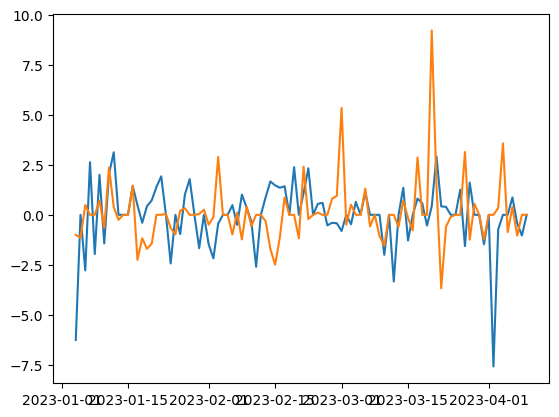

In [333]:
import matplotlib.pyplot as plt
#plt.plot(dates, prices_list)
for i in range(len(scores)):
    scores[i] *= 50
plt.plot(dates[1:], scores[1:])
difference = []
for i in range(1, len(prices_list)):
    difference.append(prices_list[i] - prices_list[i - 1])
plt.plot(dates[1:], difference)
#difference2 = []
#for i in range(1, len(difference)):
#    difference2.append(difference[i] - difference[i - 1])
#plt.plot(dates[2:], difference2)
#difference3 = []
#for i in range(1, len(difference2)):
#    difference3.append(difference2[i] - difference2[i - 1])
#plt.plot(dates[3:], difference3)
#difference4 = []
#for i in range(1, len(difference3)):
#    difference4.append(difference3[i] - difference3[i - 1])
#plt.plot(dates[4:], difference4)
#difference5 = []
#for i in range(1, len(difference4)):
#    difference5.append(difference4[i] - difference4[i - 1])
#plt.plot(dates[5:], difference5)
import numpy as np
print(np.corrcoef(np.array(scores[1:]), np.array(difference)))

In [119]:
exog = scores
endog = prices_list

In [120]:
count = int(len(scores) * 0.8)

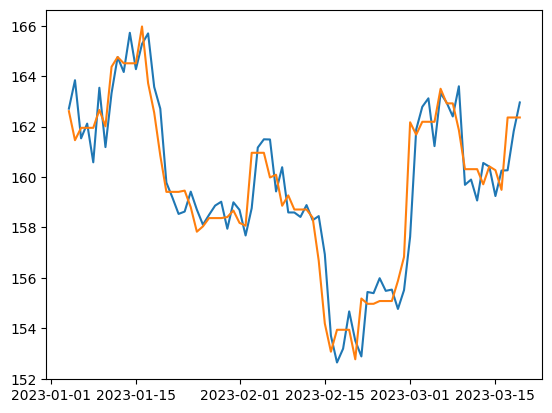

In [338]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
d = 1
arimax = SARIMAX(endog[:count], exog[:count], order=(10, d, 1))
res = arimax.fit()
plt.plot(dates[d:count - 1], res.predict()[d:-1])
plt.plot(dates[d:count - 1], prices_list[d:count - 1])

In [339]:
from sklearn.metrics import r2_score
r2_score(prices_list[d:count - 1], res.predict()[d:-1])

0.868641032003284

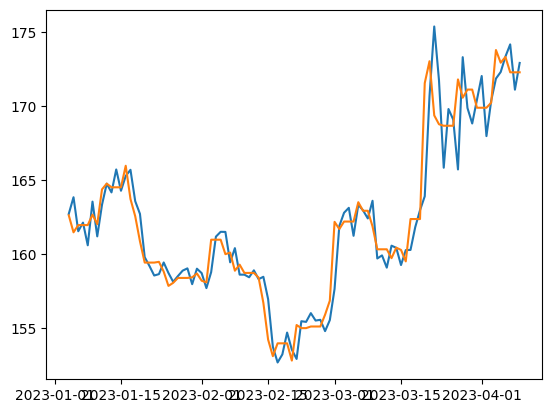

In [340]:
res = res.apply(endog[:], exog[:])
pred = res.predict()[d:]
plt.plot(dates[d:], pred)
plt.plot(dates[d:], prices_list[d:])

In [341]:
r2_score(prices_list[d:], pred[:])

0.9007310584655024

In [366]:
scores = []
with open("exog.txt") as inf:
    for line in inf.readlines():
        scores.append(float(line[:-1]))
prices = []
with open("endog.txt") as inf:
    for line in inf.readlines():
        prices.append(float(line[:-1]))
dates = []
with open("dates.txt") as inf:
    for line in inf.readlines():
        dates.append(datetime.datetime.strptime(line, "%Y-%m-%d %H:%M:%S "))

0.4905775887199323

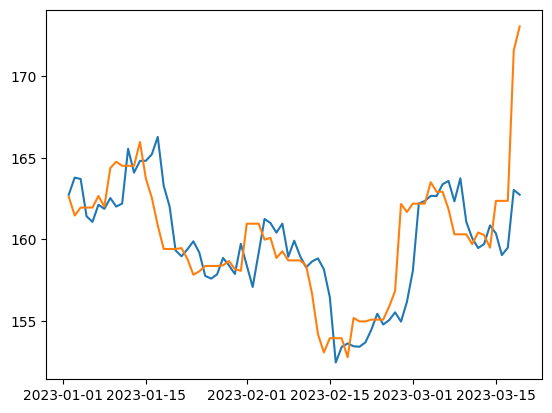

In [367]:
exog = scores
endog = prices
count = int(len(scores) * 0.8)
from statsmodels.tsa.statespace.sarimax import SARIMAX
d = 1
arimax = SARIMAX(endog[:count], exog[:count], order=(1, d, 1))
res = arimax.fit()
plt.plot(dates[d:count - 1], res.predict()[d:-1])
plt.plot(dates[d:count - 1], prices_list[d:count - 1])
r2_score(prices_list[d:count - 1], res.predict()[d:-1])

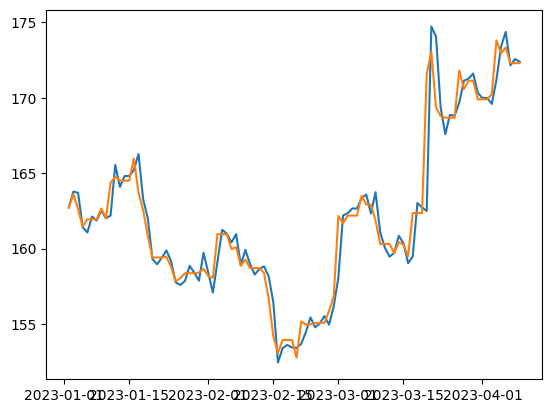

In [381]:
res = res.apply(endog[:], exog[:])
pred = res.predict()[d:]
plt.plot(dates[d:], pred)
plt.plot(dates[d:], prices[d:])
r2_score(prices[d:], pred)
price_predictions = pd.DataFrame(np.array([pred, prices[d:]]).reshape(-1, 2), columns=['predicted', 'actual'])

In [385]:
price_predictions['error'] = (price_predictions['actual'] - price_predictions['predicted']).abs() / price_predictions['actual']

In [386]:
price_predictions

,predicted,actual,error
0,162.736694,163.783769,0.006393
1,163.702698,161.413149,0.014184
2,161.071095,162.123796,0.006493
3,161.868853,162.532435,0.004083
4,162.010786,162.196159,0.001143
...,...,...,...
93,169.900000,169.900000,0.000000
94,169.900000,170.240000,0.001997
95,173.810000,172.950000,0.004973
96,173.340000,172.300000,0.006036


In [388]:
price_predictions['error'].iloc[count:].mean()

0.006484910264943404